# Create a custom spectral model


This use case illustrates how the User can define his own density
spectral function from parametric models. The library allows it thanks to
the object *UserDefinedSpectralModel* defined from:

-   a frequency grid $(-f_c, \dots, f_c)$ with step $\delta f$, stored
    in the object *RegularGrid*,
-   a collection of hermitian matrices $\in \mathbb{M}_d(\mathbb{C})$
    stored in the object *HermitianMatrixCollection*, which are the
    images of each point of the frequency grid through the density
    spectral function.


The library builds a constant piecewise function on $[-f_c,f_c]$, where
the intervals where the density spectral function is constant are
centered on the points of the frequency grid, of length $\delta f$.
Then, it is possible to evaluate the spectral density function for a
given frequency thanks to the method [*computeSpectralDensity*]{}: if
the frequency is not inside the interval $[-f_c,f_c]$, an exception is thrown.
Otherwise, it returns the hermitian matrix of the
subinterval of $[-f_c,f_c]$ that contains the given frequency.

In the following script, we illustrate how to create a modified low
pass model of dimension $d=1$ with exponential decrease defined by:
$S: \mathbb{R} \rightarrow  \mathbb{R}$ where

-   Frequency value $f$ should be positive,
-   for $f < 5 Hz$, the spectral density function is constant: $S(f)=1.0$,
-   for $f > 5 Hz$, the spectral density function is equal to $S(f) = \exp \left[- 2.0 (f - 5.0)^2 \right]$.


The frequency grid is $]0, f_c] = ]0,10]$ with $\delta f = 0.2$ Hz.
The figure draws the spectral density.


In [1]:
from __future__ import print_function
import openturns as ot
import math as m

In [2]:
# Create the frequency grid:
fmin = 0.1
df = 0.5
N = int((10.0 - fmin)/ df)
fgrid =  ot.RegularGrid(fmin, df, N)

In [3]:
# Define the spectral function:
def s(f):
    if(f <= 5.0):
        return 1.0
    else:
        x = f - 5.0
        return m.exp(-2.0 * x * x)

In [4]:
# Create the collection of HermitianMatrix:
coll = ot.HermitianMatrixCollection()
for k in range(N):
    frequency = fgrid.getValue(k)
    matrix = ot.HermitianMatrix(1)
    matrix[0, 0] = s(frequency)
    coll.add(matrix)

In [5]:
# Create the spectral model:
spectralModel = ot.UserDefinedSpectralModel(fgrid, coll)

# Get the spectral density function computed at first frequency values
firstFrequency = fgrid.getStart()
frequencyStep = fgrid.getStep()
firstHermitian = spectralModel(firstFrequency)

# Get the spectral function at frequency + 0.3 * frequencyStep
spectralModel(frequency + 0.3 * frequencyStep)

class=HermitianMatrix dimension=1 implementation=class=ComplexMatrixImplementation name=Unnamed rows=1 columns=1 values=[(2.50622e-15,0)]

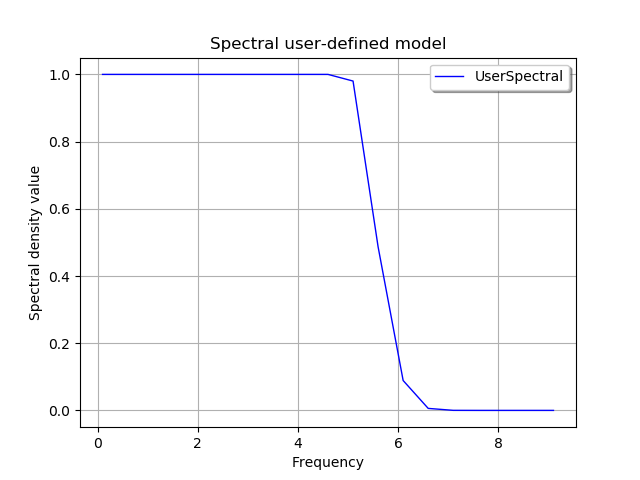

In [6]:
# Draw the spectral density

# Create the curve of the spectral function
x = ot.Sample(N, 2)
for k in range(N):
    frequency = fgrid.getValue(k)
    x[k, 0] = frequency
    value = spectralModel(frequency)
    x[k, 1] = value[0, 0].real

# Create the graph
graph = ot.Graph('Spectral user-defined model', 'Frequency', 'Spectral density value', True)
curve = ot.Curve(x, 'UserSpectral')
graph.add(curve)
graph.setLegendPosition('topright')
graph